In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [5]:
log_reg.score(X_test,y_test)


0.7894736842105263

In [6]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]

    y_predict = model.predict(X_new)
    zz=y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


<ipython-input-6-774ae85d6e0b>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


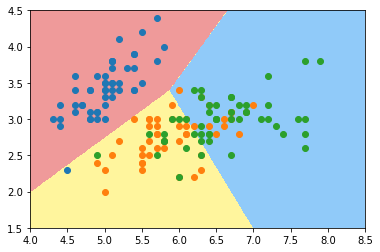

In [7]:
plot_decision_boundary(log_reg,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [8]:
log_reg2 = LogisticRegression(multi_class="multinomial",solver="newton-cg")

In [9]:
log_reg2.fit(X_train,y_train)
log_reg2.score(X_test,y_test)

0.7894736842105263

### 使用所有的数据



In [10]:
X = iris.data
y=iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)



1.0

## OvO 和 OvR

In [13]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [14]:
ovr.score(X_test,y_test)

0.9736842105263158

In [15]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train,y_train)
ovo.score(X_test,y_test)


1.0